# Epidemic data of COVID-19 in Catalonia

The [datoscovid.cat website](https://dadescovid.cat/?lang=cas) came into operation 28th of July 2020 to monitor the epidemiological epidemic of COVID-19 in Catalonia. In this notebook we will use data from this website and other sources.

You can also find interesting data in [transparenciacatalunya.cat](https://analisi.transparenciacatalunya.cat/Salut/Registre-de-defuncions-per-COVID-19-a-Catalunya-Se/uqk7-bf9s).



## Exercises:

Please, upload the completed notebook and the used files.

### Exercise 1:
We propose to explore data related with Covid-19 from Catalonia to analyze several aspects.
- **Exercise 1.A.**: Relationship between information of population of the municipality and the number of Covid-19 cases on it.

    After analyzing the relationship you should be able to answer the following questions:
    1. Do larger municipalities have a higher incidence of Covid-19?
    2. In Catalonia, the bigger the city the denser it is?
    3. Do municipalities with a higher population density have a higher incidence of Covid-19?


- **Exercise 1.B.**: Relationship between information of economy of the catalan region and the number of Covid-19 cases on it.

    After analyzing the relationship you should be able to answer the following questions:
    4. Do richer regions have a lower incidence of Covid-19?



- **Exercise 1.C.**: Analysis of the differences of Covid-19 affecting women and men in Catalonia
    
    After analyzing the relationship you should be able to answer the following questions:
    5. Does Covid-19 affect men more than women?
    6. What age groups does Covid-19 affect the most for men and women?


Please, answer the questions, and extract and write conclusions from the three anlysis. 

### Exercise 2: 

Think other possible questions which can be solved.


# Exercise 1.A. Relationship between the municipality's population and the number of Covid-19 cases

## Data from COVID-19 and municipality

Our first objective is to plot relationship between information of population of the municipalities and the number of Covid-19 cases on these municipalities.

For that, we need access to Covid-19 data and data from the municipalities in Catalonia that can be achieved from [datoscovid.cat](https://dadescovid.cat/) and from [IDESCAT](https://www.idescat.cat), respectively.

You can download the following files from the websites:
- Data of the register of Covid-19 cases carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of population for the municipalities with more than 20.000 people (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=250)): "t15228.csv"


### Some help for the exercise:

- Load the two tables (casos_sexe_municipi.csv and t15228.csv) as dataframes.
- Clean the data and prepare it for analysis (there are empty rows in the files).
- Merge the two tables:
    - For the correct matching, check if the name of the municipalities are all the same in the two tables (apostrophes and accents).
- Plot the relationship between population and covid cases.
    - Remove outliers if there are any.
- Instead of using global numbers, compute the incidence of covid as a ratio of cases per capita and redraw the plot.
- Answer the questions posed.


<div class="alert" style="padding: 20px;background-color: #2cbc85; color: white; margin-bottom: 15px; font-size:20px">
SOLUTION EXERCISE 1.A.
</div>

## Text preprocess

In [1]:
# Needed imports 
import pandas as pd
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'data/' # path to your folder

Let us read both tables as a dataframes.

In [3]:
# Read csv files
Casos_Mun_Sex = pd.read_csv(path + 'casos_sexe_municipi.csv',sep=';',encoding = 'ISO-8859-1')
Casos_Mun_Sex = Casos_Mun_Sex.drop(['DISTRICTE_CODI','DISTRICTEDESCRIPCIO'],axis=1)
Casos_Mun_Sex = Casos_Mun_Sex.dropna()
Population = pd.read_csv(path + 't15228.csv',sep=';',skiprows=5,header = None).dropna()
Population.columns = ['MUNICIPIDESCRIPCIO','Poblacio','Superficie','Densitat','Rang per nombre hab']

In [4]:
# Visualize Casos_Mun_Sex
Casos_Mun_Sex.head()

,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,MUNICIPIDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,23/09/2020,11.0,BAIX LLOBREGAT,8073.0,CORNELLÀ DE LLOBREGAT,1.0,Dona,Positiu per ELISA,3
3,10/06/2020,13.0,BARCELONES,8019.0,BARCELONA,0.0,Home,Positiu per ELISA,6
4,05/06/2020,40.0,VALLES OCCIDENTAL,8187.0,SABADELL,1.0,Dona,Positiu per ELISA,2
5,24/08/2020,13.0,BARCELONES,8019.0,BARCELONA,1.0,Dona,Positiu per ELISA,1
6,08/09/2020,13.0,BARCELONES,8019.0,BARCELONA,0.0,Home,Positiu per ELISA,2


In [5]:
# Visualize Population
Population.head()

,MUNICIPIDESCRIPCIO,Poblacio,Superficie,Densitat,Rang per nombre hab
0,Barcelona,1636193,"101,4","16144,0",1
1,"Hospitalet de Llobregat, l'",265444,"12,4","21406,8",2
2,Terrassa,224114,"70,2","3194,3",3
3,Badalona,223506,"21,2","10552,7",4
4,Sabadell,215760,"37,8","5709,5",5


Now, let us prepare the dataframes for the merge using the column `MUNICIPIDESCRIPCIO`. In the next cell, we can observe the strings we need to process in both dataframes. There are many issues with apostrophes, mostly in the Population dataframe. Moreover, to avoid problems, we will remove accents in both dataframes.

In [6]:
# Data without text preprocess
print(Population['MUNICIPIDESCRIPCIO'].unique())
print('\n\n--------------------------------------------------------------------------\n\n')
print(Casos_Mun_Sex['MUNICIPIDESCRIPCIO'].unique())

['Barcelona' "Hospitalet de Llobregat, l'" 'Terrassa' 'Badalona'
 'Sabadell' 'Lleida' 'Tarragona' 'Mataró' 'Santa Coloma de Gramenet'
 'Reus' 'Girona' 'Sant Cugat del Vallès' 'Cornellà de Llobregat'
 'Sant Boi de Llobregat' 'Rubí' 'Manresa' 'Vilanova i la Geltrú'
 'Castelldefels' 'Viladecans' 'Prat de Llobregat, el' 'Granollers'
 'Cerdanyola del Vallès' 'Mollet del Vallès' 'Vic' 'Figueres' 'Gavà'
 'Esplugues de Llobregat' 'Sant Feliu de Llobregat' 'Igualada' 'Blanes'
 'Vilafranca del Penedès' 'Vendrell, el' 'Ripollet' 'Lloret de Mar'
 'Sant Adrià de Besòs' 'Olot' 'Montcada i Reixac' 'Cambrils'
 'Sant Joan Despí' 'Tortosa' 'Barberà del Vallès' 'Salt'
 'Sant Pere de Ribes' 'Sitges' 'Calafell' 'Salou' 'Martorell'
 'Premià de Mar' 'Pineda de Mar' 'Sant Vicenç dels Horts'
 'Sant Andreu de la Barca' 'Molins de Rei' 'Santa Perpètua de Mogoda'
 'Castellar del Vallès' 'Valls' 'Olesa de Montserrat' 'Masnou, el'
 'Palafrugell' 'Vila-seca' 'Esparreguera' 'Sant Feliu de Guíxols'
 'Amposta' 'Vilassa

Let us preprocess the text in the Population dataframe so that it matches the format in the Casos_Mun_Sex dataframe.

In [7]:
# Convert to lower case
'''
Example: BARCELONA --> barcelona
'''
Casos_Mun_Sex['MUNICIPIDESCRIPCIO'] = Casos_Mun_Sex['MUNICIPIDESCRIPCIO'].str.lower()
Population['MUNICIPIDESCRIPCIO'] = Population['MUNICIPIDESCRIPCIO'].str.lower()

#  Convert Unicode text into ASCII text
'''
Example: mataró --> mataro
'''
Casos_Mun_Sex['MUNICIPIDESCRIPCIO'] = Casos_Mun_Sex['MUNICIPIDESCRIPCIO'].apply(lambda x: unidecode(x))
Population['MUNICIPIDESCRIPCIO'] = Population['MUNICIPIDESCRIPCIO'].apply(lambda x: unidecode(x))

# If we find a comma, move the order of the sentence. This only happens on Population dataframe
'''
Example: Hospitalet de Llobregat, l'--> l' Hospitalet de Llobregat
'''
# Define a function to reverse the order of the words
def reverse_words(string):
    if ',' in string:
        comma_index = string.index(',')
        part1 = string[comma_index+1:]
        part2 = string[:comma_index]
        result = part1 + ' ' + part2
        return result
    else:
        return string
Population['MUNICIPIDESCRIPCIO'] = Population['MUNICIPIDESCRIPCIO'].apply(lambda x: reverse_words(x))

# Fix apostrophes position
'''
Example: l' Hospitalet de Llobregat --> l'Hospitalet de Llobregat
'''
Population['MUNICIPIDESCRIPCIO'] = Population['MUNICIPIDESCRIPCIO'].apply(lambda x: x.replace("' ", "'"))
Casos_Mun_Sex['MUNICIPIDESCRIPCIO'] = Casos_Mun_Sex['MUNICIPIDESCRIPCIO'].apply(lambda x: x.replace("' ", "'"))

# Normalize spaces (To ensure spaces are correct)
Population['MUNICIPIDESCRIPCIO'] = Population['MUNICIPIDESCRIPCIO'].apply(lambda x: ' '.join(x.split()))
Casos_Mun_Sex['MUNICIPIDESCRIPCIO'] = Casos_Mun_Sex['MUNICIPIDESCRIPCIO'].apply(lambda x: ' '.join(x.split()))


Let us print again the Population dataframe municipilaties to evaluate if the text is ready to merge or not. Notice that we are ready!

In [8]:
Population['MUNICIPIDESCRIPCIO'].unique()

array(['barcelona', "l'hospitalet de llobregat", 'terrassa', 'badalona',
       'sabadell', 'lleida', 'tarragona', 'mataro',
       'santa coloma de gramenet', 'reus', 'girona',
       'sant cugat del valles', 'cornella de llobregat',
       'sant boi de llobregat', 'rubi', 'manresa', 'vilanova i la geltru',
       'castelldefels', 'viladecans', 'el prat de llobregat',
       'granollers', 'cerdanyola del valles', 'mollet del valles', 'vic',
       'figueres', 'gava', 'esplugues de llobregat',
       'sant feliu de llobregat', 'igualada', 'blanes',
       'vilafranca del penedes', 'el vendrell', 'ripollet',
       'lloret de mar', 'sant adria de besos', 'olot',
       'montcada i reixac', 'cambrils', 'sant joan despi', 'tortosa',
       'barbera del valles', 'salt', 'sant pere de ribes', 'sitges',
       'calafell', 'salou', 'martorell', 'premia de mar', 'pineda de mar',
       'sant vicenc dels horts', 'sant andreu de la barca',
       'molins de rei', 'santa perpetua de mogoda',
    

## Merge dataframes

Now that the `MUNICIPIDESCRIPCIO` column is preprocessed, we can merge both dataframes using this feature.

In [9]:
# Merge
df = pd.merge(Population,Casos_Mun_Sex,on='MUNICIPIDESCRIPCIO',how='inner')

In [10]:
# Visualization of the final dataframe
df.head()

,MUNICIPIDESCRIPCIO,Poblacio,Superficie,Densitat,Rang per nombre hab,TIPUSCASDATA,COMARCACODI,COMARCADESCRIPCIO,MUNICIPICODI,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,barcelona,1636193,"101,4","16144,0",1,10/06/2020,13.0,BARCELONES,8019.0,0.0,Home,Positiu per ELISA,6
1,barcelona,1636193,"101,4","16144,0",1,24/08/2020,13.0,BARCELONES,8019.0,1.0,Dona,Positiu per ELISA,1
2,barcelona,1636193,"101,4","16144,0",1,08/09/2020,13.0,BARCELONES,8019.0,0.0,Home,Positiu per ELISA,2
3,barcelona,1636193,"101,4","16144,0",1,07/07/2021,13.0,BARCELONES,8019.0,0.0,Home,Positiu per Test Ràpid,3
4,barcelona,1636193,"101,4","16144,0",1,10/08/2020,13.0,BARCELONES,8019.0,0.0,Home,Positiu per ELISA,8


In [11]:
# Check if the number of unique municipalities in the merged dataframe and in the Population one are the same
if df['MUNICIPIDESCRIPCIO'].nunique() == Population['MUNICIPIDESCRIPCIO'].nunique():
    print('Successful merge. Go on!!')
else:
    print('Error in unique municipies found.')

Successful merge. Go on!!


## Relation between population and Covid-19 cases

Before answering the questions requiered, let us make some plots and calculations. Notice that we are asked to answer three different questions. To solve the first one, we need to compute the relation between Covid-19 cases and population. In order to imlement this, let us create a new dataframe in which we group by  municipalities and we add both, the total number of Covid-19 cases and the total number of inhabitants per municipi.

In [12]:
# Creation of the new dataframe
df_grouped1 = df.groupby('MUNICIPIDESCRIPCIO')['NUMCASOS'].sum()
df_grouped1 = df_grouped1.reset_index()
df_grouped2 = df.groupby('MUNICIPIDESCRIPCIO')['Poblacio'].first()
df_grouped2 = df_grouped2.reset_index()
df_hab_cases = pd.merge(df_grouped1,df_grouped2, on='MUNICIPIDESCRIPCIO', how = 'inner')
df_hab_cases.head()

,MUNICIPIDESCRIPCIO,NUMCASOS,Poblacio
0,amposta,7188,21807
1,badalona,77848,223506
2,banyoles,7663,20187
3,barbera del valles,11065,33082
4,barcelona,580275,1636193


The function `lmplot` from seaborn can be used to plot data and visualize the relationship between two variables, while also estimating and displaying the linear regression model that best fits the data.

The plot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

Let us use it!

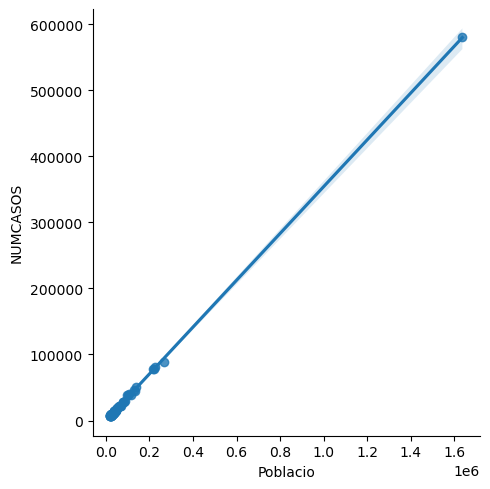

In [13]:
# Correlation plot between population and number of Covid-19 cases
sns.lmplot(x = 'Poblacio', y = 'NUMCASOS', data = df_hab_cases)
plt.show()

In this case, notice that Barcelona can be trated as an outlier, since the number of inhabitants is very big compared to the others. Let us remove it and plot again the correlation plot. Moreover, we will further restrict the dataset to municipalities with less than 120,000 inhabitants in order to observe better what is happening in the municipalities with a low number of inhabitants. Let us make these two plots!!
<a id='corrplot1'></a>

------------------WITHOUT BARCELONA------------------


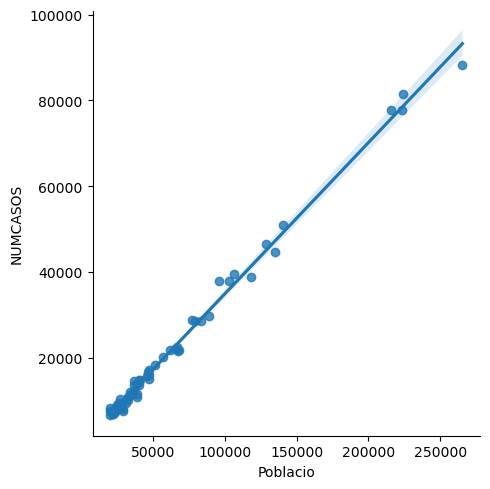

--------------LESS THAN 120000 INHABITANTS---------------


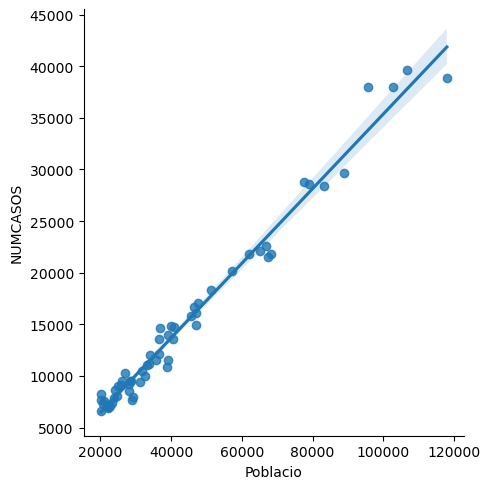

In [14]:
# Remove Barcelona
df_no_outliers = df_hab_cases[df_hab_cases.iloc[:, 0] != 'barcelona']

# Correlation plot between population and number of Covid-19 cases
print('------------------WITHOUT BARCELONA------------------')
sns.lmplot(x = 'Poblacio', y = 'NUMCASOS', data = df_no_outliers)
plt.show()
# Remove municipalities with more than 120000 inhabitants
df_reduced_outliers = df_hab_cases[df_hab_cases['Poblacio']<120000]

# Correlation plot between population and number of Covid-19 cases
print('--------------LESS THAN 120000 INHABITANTS---------------')
sns.lmplot(x = 'Poblacio', y = 'NUMCASOS', data = df_reduced_outliers)

plt.show()

On the first plot, we can observe the result removing only Barcelona and, in the second, removing all municipalities with more than 120.000 inhabitants. We can observe that the behaviour is very similar in both cases. Moreover, we can use "corr" function from Pandas and heatmap function from Seaborn for studying the variables relationship, plotting a diagonal correlation matrix.
<a id='corrmat1'></a>

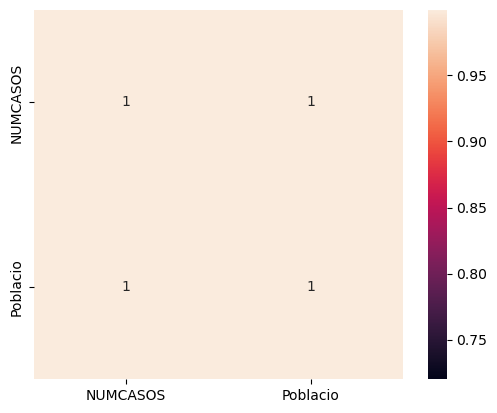

In [15]:
corrmat = df_hab_cases.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

### Relationship between population and Covid-19 cases as a ratio

Now, instead of using global numbers, let us compute the incidence of covid as a ratio of cases per capita and redraw the plot. In order to achieve this, let us compute a new column, adding the ratio of cases per capita.
<a id='approach'></a>

In [16]:
# Creation and visualization of the new datframe
df_hab_cases['Ratio'] = df_hab_cases['NUMCASOS'] / df_hab_cases['Poblacio']
df_hab_cases.head()

,MUNICIPIDESCRIPCIO,NUMCASOS,Poblacio,Ratio
0,amposta,7188,21807,0.329619
1,badalona,77848,223506,0.348304
2,banyoles,7663,20187,0.379601
3,barbera del valles,11065,33082,0.334472
4,barcelona,580275,1636193,0.354649


Let us recompute the plots, using the `Ratio` instead of `NUMCASOS`. First, let us compute the plot with the whole dataframe and, secondly, two more plots, without outliers, first without Barcelona and secondly removing all municipalities with more than 120.000 inhabitants.

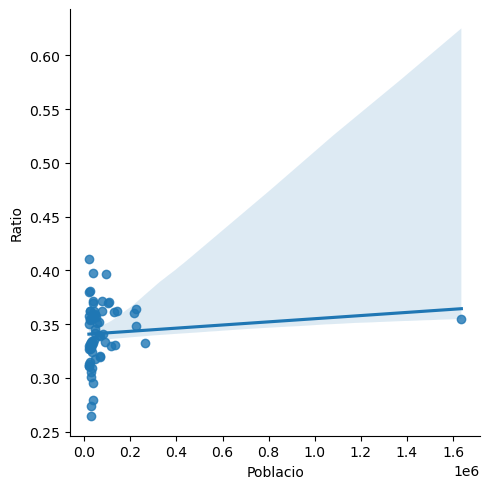

In [17]:
# Correlation plot between population and number of Covid-19 cases as a ratio
sns.lmplot(x = 'Poblacio', y = 'Ratio', data = df_hab_cases)
plt.show()

Removing outliers...
<a id='corrplot2'></a>

-----------------------WITHOUT BARCELONA------------------------


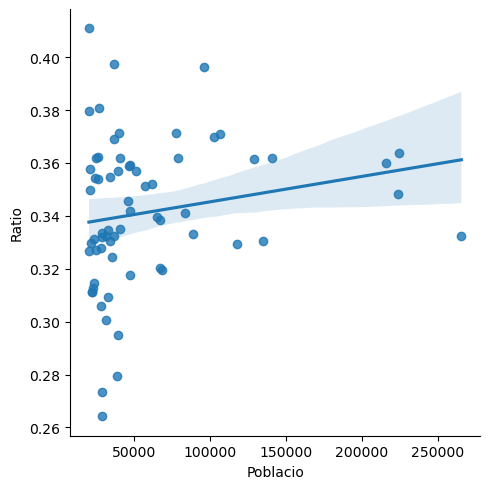

-----------------------LESS THAN 120000 INHABITANTS------------------------


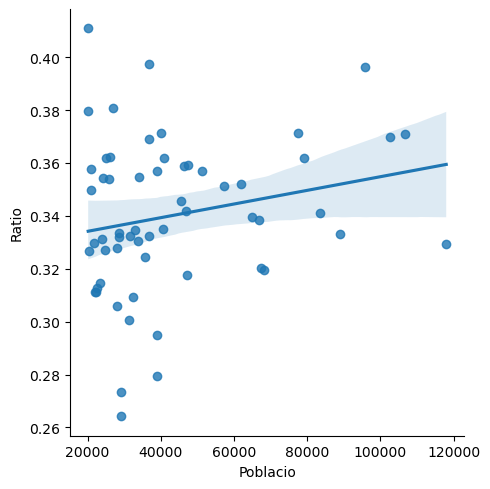

In [18]:
# Remove Barcelona
df_no_outliers = df_hab_cases[df_hab_cases.iloc[:, 0] != 'barcelona']

# Correlation plot between population and number of Covid-19 cases as a ratio
print('-----------------------WITHOUT BARCELONA------------------------')
sns.lmplot(x = 'Poblacio', y = 'Ratio', data = df_no_outliers)
plt.show()

# Remove municipalities with more than 120000 inhabitants
df_reduced_outliers = df_hab_cases[df_hab_cases['Poblacio']<120000]

# Correlation plot between population and number of Covid-19 cases as a ratio
print('-----------------------LESS THAN 120000 INHABITANTS------------------------')
sns.lmplot(x = 'Poblacio', y = 'Ratio', data = df_reduced_outliers)

plt.show()

The correlation does not seem to be so obvious now. Again, let us compute the heatmap for studying the variables relationship, plotting a diagonal correlation matrix.
<a id='corrmat2'></a>

------------Correlation matrix using the whole dataframe---------------


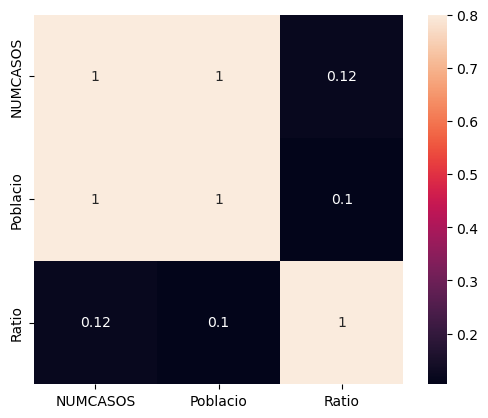

------------Correlation matrix using the reduced (no outliers) dataframe---------------


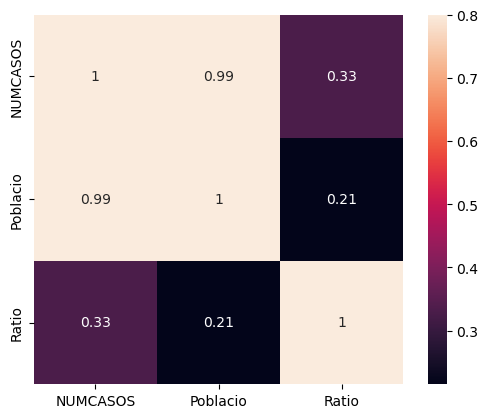

In [19]:
print('------------Correlation matrix using the whole dataframe---------------')
corrmat = df_hab_cases.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()
print('------------Correlation matrix using the reduced (no outliers) dataframe---------------')
corrmat = df_reduced_outliers.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

### Question 1.A.1

**Do larger municipalities have a higher incidence of Covid-19?**

> At the outset of our analysis on the relationship between Covid-19 cases and population, the correlation was readily apparent. Both the [correlation plot](#corrplot1) and the [correlation matrix](#corrmat1) indicated a strong positive correlation between population and Covid-19 cases, in other words, larger municipalities tended to exhibit a higher incidence of the virus. However, this is not an accurate measurement as larger municipalities naturally have more Covid-19 cases due to their higher population. A better measure would be to calculate the ratio of Covid-19 cases to population, as shown in the approach implemented [here](#approach). This measure allows us to observe whether the ratio between population and Covid-19 cases is increasing or decreasing. Upon examining the [correlation plot](#corrplot2) and [correlation matrix](#corrmat2), we can conclude that there is no correlation between this ratio and population size. In fact, the ratio, in most of the cases, is similar across all municipalities (between 0.32 and 0.36), for example, Amposta and Badalona (municipalities with a large difference in the number of inhabitants, but similar ratio). Therefore, we can conclude that **larger municipalities tend to have a higher incidence of Covid-19 cases, but maintaining the same proportion between Covid-19 cases and inhabitants (ratio).**

## Relation between region area and density


To answer the second question of this exercise, we need to compute correlations between surface area and density of the municipalities. The first thing we are going to do, is to build a suitable dataset for this problem. Let's get down to business!

In [21]:
# Creation of the new dataframe
df_sup_dens = df[['MUNICIPIDESCRIPCIO','Superficie', 'Densitat']].drop_duplicates()

# Change comma to point in order to get floats
df_sup_dens['Superficie'] = df_sup_dens['Superficie'].apply(lambda x: float(x.replace(',', '.')))
df_sup_dens['Densitat'] = df_sup_dens['Densitat'].apply(lambda x: float(x.replace(',', '.')))

# Visualization of the new dataframe
df_sup_dens.head()

,MUNICIPIDESCRIPCIO,Superficie,Densitat
0,barcelona,101.4,16144.0
40651,l'hospitalet de llobregat,12.4,21406.8
45241,terrassa,70.2,3194.3
48946,badalona,21.2,10552.7
53249,sabadell,37.8,5709.5


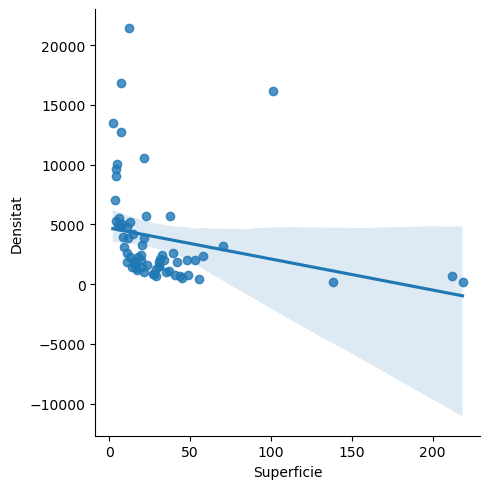

In [22]:
# Correlation plot between region area and density
sns.lmplot(x = 'Superficie', y = 'Densitat', data = df_sup_dens)
plt.show()

As before, to observe better the regression line, let us remove some municipalities with high surface area (remove outliers) and repeat the same plot.
<a id='corrplot3'></a>

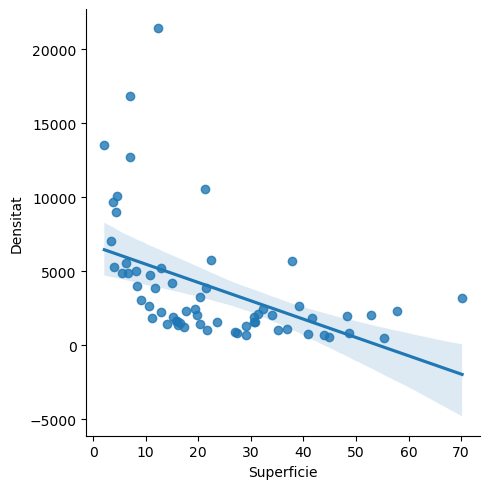

In [23]:
# Remove municipalities with more than 100 of surface area
df_reduced_outliers = df_sup_dens[df_sup_dens['Superficie']<100]

# Correlation plot between region area and density
sns.lmplot(x = 'Superficie', y = 'Densitat', data = df_reduced_outliers)
plt.show()

The behaviour is really similar to the previous plot (without outliers). There does not appear to be any relationship between these two variables, to make sure and finish, let us compute the correlation matrix using the heatmap.
<a id='corrmat3'></a>

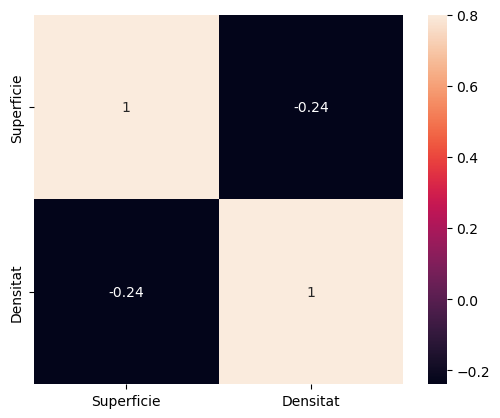

In [24]:
corrmat = df_sup_dens.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

### Question 1.A.2

**In Catalonia, the bigger the city the denser it is?**

> Upon examining the [correlation plot](#corrplot3) and the [correlation matrix](#corrmat3), it is evident that we cannot definitively conclude that larger cities are also more densely populated. In fact, we observe a **slight negative correlation** between city size and population density, meaning that **as city size increases, population density tends to decrease slightly.**

## Relation between density and Covid-19 cases

Finally, to answer the last question of this exercise, we need to compute some relationships between population municipalities density and Covid-19 cases. Let us create a suitable dataframe to this problem and plot the `lmplot` form seaborn, as well as, the correlation matrix.

In [25]:
# Creation of the new dataframe
df_grouped1 = df.groupby('MUNICIPIDESCRIPCIO')['NUMCASOS'].sum()
df_grouped1 = df_grouped1.reset_index()
df_grouped2 = df.groupby('MUNICIPIDESCRIPCIO')['Densitat'].first()
df_grouped2 = df_grouped2.reset_index()
df_dens_cases = pd.merge(df_grouped1,df_grouped2, on='MUNICIPIDESCRIPCIO', how = 'inner')

# Change comma to point in order to get floats
df_dens_cases['Densitat'] = df_dens_cases['Densitat'].apply(lambda x: float(x.replace(',', '.')))

df_dens_cases.head()

,MUNICIPIDESCRIPCIO,NUMCASOS,Densitat
0,amposta,7188,157.7
1,badalona,77848,10552.7
2,banyoles,7663,1826.9
3,barbera del valles,11065,3981.0
4,barcelona,580275,16144.0


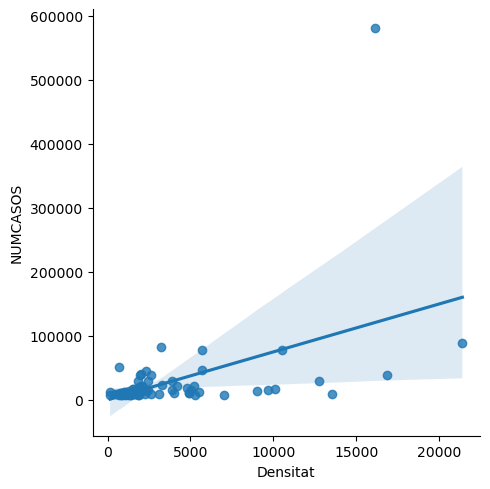

In [26]:
# Correlation plot between region density and Covid-19 cases
sns.lmplot(x = 'Densitat', y = 'NUMCASOS', data = df_dens_cases)
plt.show()

As before, we need to remove outliers to have a better view of the plot. Let us remove Barcelona and some municipalites with high densities.
<a id='corrplot4'></a>

-----------------------WITHOUT BARCELONA------------------------


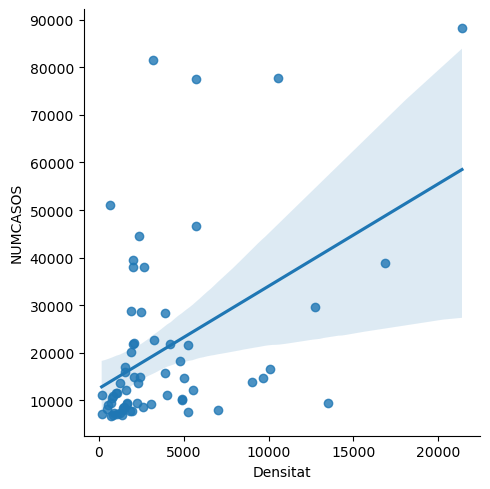

-----------------------LESS THAN 14000 DENSITY------------------------


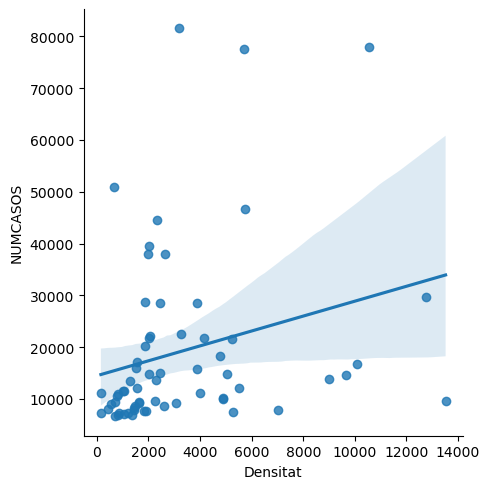

In [27]:
# Remove Barcelona
df_no_outliers = df_dens_cases[df_dens_cases.iloc[:, 0] != 'barcelona']

# Correlation plot between region density and Covid-19 cases
print('-----------------------WITHOUT BARCELONA------------------------')
sns.lmplot(x = 'Densitat', y = 'NUMCASOS', data = df_no_outliers)
plt.show()

# Remove municipalities with more than 15000 of density
df_reduced_outliers = df_dens_cases[df_dens_cases['Densitat']<15000]

# Correlation plot between region density and Covid-19 cases
print('-----------------------LESS THAN 14000 DENSITY------------------------')
sns.lmplot(x = 'Densitat', y = 'NUMCASOS', data = df_reduced_outliers)

plt.show()

There seems to be some kind of relationship but not a very high one. Let's calculate the heatmap to get more information.
<a id='corrmat4'></a>

------------Correlation matrix using the whole dataframe---------------


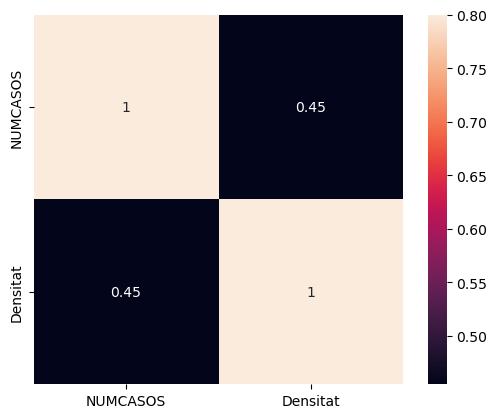

------------Correlation matrix using the reduced (no outliers) dataframe---------------


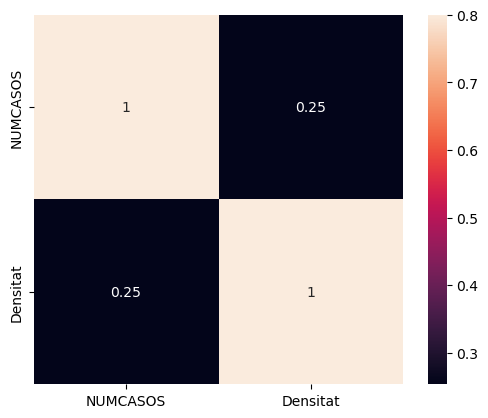

In [28]:
print('------------Correlation matrix using the whole dataframe---------------')
corrmat = df_dens_cases.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()
print('------------Correlation matrix using the reduced (no outliers) dataframe---------------')
corrmat = df_reduced_outliers.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

### Question 1.A.3

**Do municipalities with a higher population density have a higher incidence of Covid-19?**

>It's worth noting that upon initially examining the [correlation plot](#corrplot4) and [correlation matrix](#corrmat4) without removing the outliers, there seemed to be a strong correlation between the two variables, with a correlation value of 0.45 in the matrix. However, once the outliers were removed and the plot was redrawn, the correlation became less clear although it still remained present. Based on this analysis, it can be concluded that **municipalities with higher population densities generally have a higher incidence of Covid-19 cases.**

# Exercise 1.B. Relationship between catalan region economy and number of Covid-19 cases

## Data from COVID-19 and region (comarca)


For the second analysis, we can find data of the Territorial gross domestic product (GDP) (in catalan: Producte interior brut territorial (PIB)) (base 2017) for the anlaysis from [IDESCAT](https://www.idescat.cat/).

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and municipality (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_municipi.csv"
- Data of the Producte interior brut territorial (PIB) by region (in ctalan: comarca) (base 2017) (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=358)): "t15336.csv"
- Population data by municipalities and regions (source: [IDESCAT](https://www.idescat.cat/pub/?id=aec&n=925&t=2019)): "t15903.csv"


<div class="alert" style="padding: 20px;background-color: #2cbc85; color: white; margin-bottom: 15px; font-size:20px">
SOLUTION EXERCISE 1.B.
</div>

First of all, let us read the `t15336.csv` file, in which we have information of the GDP by regions.

In [29]:
# Read the needed data and visualize the GDP_region dataframe
Casos_Mun_Sex = pd.read_csv(path + 'casos_sexe_municipi.csv',sep=';',encoding = 'ISO-8859-1')
Casos_Mun_Sex = Casos_Mun_Sex.drop(['DISTRICTE_CODI','DISTRICTEDESCRIPCIO'],axis=1)
Casos_Mun_Sex = Casos_Mun_Sex.dropna()
GDP_region = pd.read_csv(path + 't15336.csv',sep=';',skiprows=6, decimal=',').dropna()
GDP_region = GDP_region[GDP_region['COMARCADESCRIPCIO']!='Catalunya']
GDP_region.head()

,COMARCADESCRIPCIO,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100
0,Alt Camp,1455.2,32.3,111.0
1,Alt Empordà,3162.1,22.6,77.6
2,Alt Penedès,3097.9,28.1,96.6
3,Alt Urgell,441.1,21.9,75.3
4,Alta Ribagorça,81.3,20.8,71.3


Now, we want to merge this dataset with the previous dataframe about cases of COVID-19 carried out in Catalonia segregated by sex and municipality on the column `COMARCADESCRIPCIO`. In order to do this, we need to prepare both dataframes. Let us print both columns to see what we need to preprocess.

In [30]:
# Data without text preprocess
print(GDP_region['COMARCADESCRIPCIO'].unique())
print('\n\n--------------------------------------------------------------------------\n\n')
print(Casos_Mun_Sex['COMARCADESCRIPCIO'].unique())

['Alt Camp' 'Alt Empordà' 'Alt Penedès' 'Alt Urgell' 'Alta Ribagorça'
 'Anoia' 'Aran' 'Bages' 'Baix Camp' 'Baix Ebre' 'Baix Empordà'
 'Baix Llobregat' 'Baix Penedès' 'Barcelonès' 'Berguedà' 'Cerdanya'
 'Conca de Barberà' 'Garraf' 'Garrigues' 'Garrotxa' 'Gironès' 'Maresme'
 'Moianès' 'Montsià' 'Noguera' 'Osona' 'Pallars Jussà' 'Pallars Sobirà'
 "Pla d'Urgell" "Pla de l'Estany" 'Priorat' "Ribera d'Ebre" 'Ripollès'
 'Segarra' 'Segrià' 'Selva' 'Solsonès' 'Tarragonès' 'Terra Alta' 'Urgell'
 'Vallès Occidental' 'Vallès Oriental']


--------------------------------------------------------------------------


['BAIX LLOBREGAT' 'BARCELONES' 'VALLES OCCIDENTAL' 'BAGES' 'OSONA'
 'GARROTXA' 'ANOIA' 'MARESME' 'SEGRIA' 'GARRAF' 'VALLES ORIENTAL' 'SELVA'
 'ALT URGELL' 'TARRAGONES' 'GIRONES' 'BAIX CAMP' 'ALT PENEDES' 'BAIX EBRE'
 'BERGUEDA' 'GARRIGUES' 'MOIANÈS' 'ALT EMPORDA' "PLA D'URGELL" 'MONTSIA'
 'SOLSONES' 'URGELL' 'SEGARRA' 'BAIX PENEDES' 'BAIX EMPORDA'
 "RIBERA D'EBRE" "VALL D'ARAN" 'CONCA DE 

Notice that, moving to lower cases the `Casos_Mun_Sex['COMARCADESCRIPCIO']` and removing accents in both dataframes, we will be ready to perform the merge. Let us do it!

In [31]:
# Text preprocess and merge

# ---------------------------------TEXT PREPROCESS------------------------------------
# Convert to lower case
'''
Example: BAIX LLOBREGAT--> baix llobregat
'''
Casos_Mun_Sex['COMARCADESCRIPCIO'] = Casos_Mun_Sex['COMARCADESCRIPCIO'].str.lower()
GDP_region['COMARCADESCRIPCIO'] = GDP_region['COMARCADESCRIPCIO'].str.lower()

#  Convert Unicode text into ASCII text
'''
Example: alt penedès --> alt penedes
'''
Casos_Mun_Sex['COMARCADESCRIPCIO'] = Casos_Mun_Sex['COMARCADESCRIPCIO'].apply(lambda x: unidecode(x))
GDP_region['COMARCADESCRIPCIO'] = GDP_region['COMARCADESCRIPCIO'].apply(lambda x: unidecode(x))

# vall d'aran --> aran in Casos_Mun_Sec for a successful match
Casos_Mun_Sex['COMARCADESCRIPCIO'] = Casos_Mun_Sex['COMARCADESCRIPCIO'].replace("vall d'aran", "aran")

# ------------------------------------- MERGE ----------------------------------------
df = pd.merge(GDP_region,Casos_Mun_Sex,on='COMARCADESCRIPCIO',how='inner')

# Check if the merge has been successful
if df['COMARCADESCRIPCIO'].nunique() == GDP_region['COMARCADESCRIPCIO'].nunique():
    print('Successful merge. Go on!!')
else:
    print('Error in unique municipies found.')
    
# Visualization of the new dataframe
df.head()

Successful merge. Go on!!


,COMARCADESCRIPCIO,PIB (milions d'euros),PIB per habitant (milers d'euros),Índex Catalunya = 100,TIPUSCASDATA,COMARCACODI,MUNICIPICODI,MUNICIPIDESCRIPCIO,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,alt camp,1455.2,32.3,111.0,18/03/2020,1.0,43161.0,VALLS,1.0,Dona,PCR probable,1
1,alt camp,1455.2,32.3,111.0,18/08/2020,1.0,43161.0,VALLS,0.0,Home,PCR probable,1
2,alt camp,1455.2,32.3,111.0,29/07/2020,1.0,43036.0,CABRA DEL CAMP,1.0,Dona,Positiu per ELISA,1
3,alt camp,1455.2,32.3,111.0,26/03/2022,1.0,43108.0,EL PLA DE SANTA MARIA,1.0,Dona,Positiu per ELISA,1
4,alt camp,1455.2,32.3,111.0,20/05/2021,1.0,43098.0,NULLES,0.0,Home,Positiu per ELISA,1


Let us obtain a suitable reduced dataframe from our problem. Recall that we want to observe if richer regions have a lower incidence of Covid-19. Let us select some columns and visualize the dataset we are going to work with.

In [32]:
# Creation of the new dataframe
df_grouped1 = df.groupby('COMARCADESCRIPCIO')['NUMCASOS'].sum()
df_grouped1 = df_grouped1.reset_index()
df_grouped2 = df.groupby('COMARCADESCRIPCIO')[["PIB (milions d'euros)"]].first()
df_grouped2 = df_grouped2.reset_index()
df_GDP_cases = pd.merge(df_grouped1,df_grouped2, on='COMARCADESCRIPCIO', how = 'inner')
df_GDP_cases.head()

,COMARCADESCRIPCIO,NUMCASOS,PIB (milions d'euros)
0,alt camp,13778,1455.2
1,alt emporda,43066,3162.1
2,alt penedes,38196,3097.9
3,alt urgell,6631,441.1
4,alta ribagorca,1197,81.3


Let us observe if `PIB(millions d'euros)` is correlated with `NUMCASOS`. Let us plot the correlation plot using the `lmplot` from seaborn and the correlation matrix, as we have done in the previous exercise.

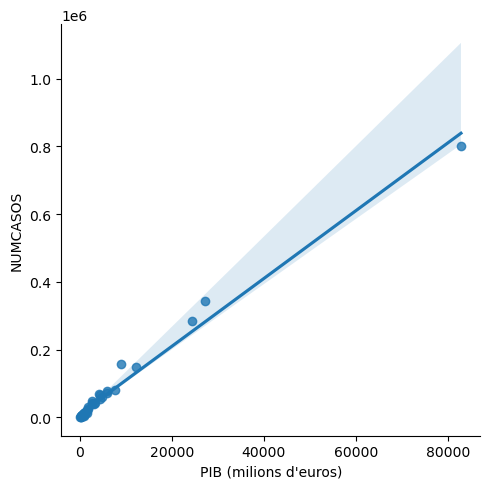

In [33]:
# Correlation plot between GDP and Covid-19 cases
sns.lmplot(x = "PIB (milions d'euros)", y = 'NUMCASOS', data = df_GDP_cases)
plt.show()

Removing outliers...

-----------------------WITHOUT BARCELONA------------------------


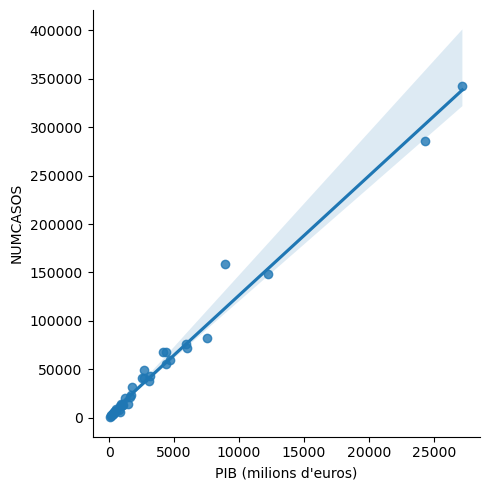

-----------------------LESS THAN 24000 of GDP------------------------


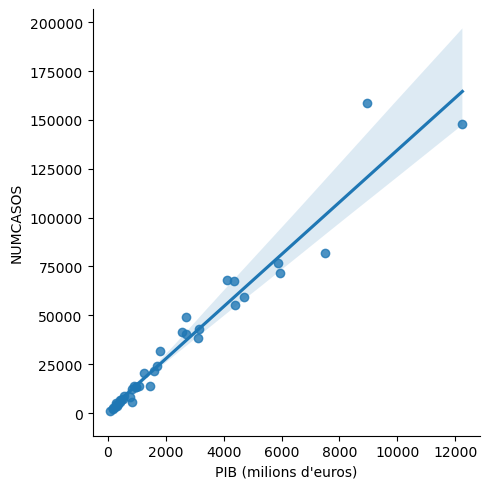

In [34]:
# Remove Barcelonès
df_no_outliers = df_GDP_cases[df_GDP_cases.iloc[:, 0] != 'barcelones']

# Correlation plot between population and number of Covid-19 cases as a ratio
print('-----------------------WITHOUT BARCELONA------------------------')
sns.lmplot(x = "PIB (milions d'euros)", y = 'NUMCASOS', data = df_no_outliers)
plt.show()

# Remove municipalities with more than 24000 of GDP
df_reduced_outliers = df_GDP_cases[df_GDP_cases["PIB (milions d'euros)"]<24000]

# Correlation plot between population and number of Covid-19 cases as a ratio
print('-----------------------LESS THAN 24000 of GDP------------------------')
sns.lmplot(x = "PIB (milions d'euros)", y = 'NUMCASOS', data = df_reduced_outliers)

plt.show()

There seems to be a strong relationship between GDP and the number of covid cases, but perhaps, it is not the expected one. It seems that richer regions have a higher incidence of covid. Let us plot the correlation matrix for further information.

------------Correlation matrix using the whole dataframe---------------


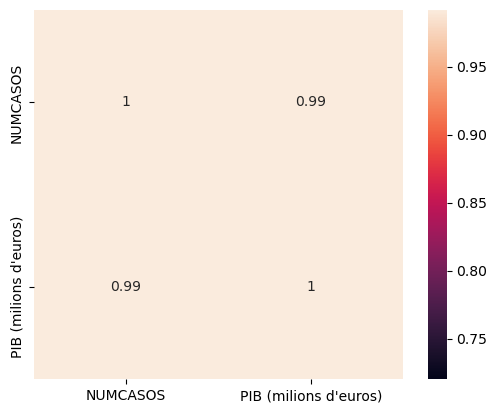

------------Correlation matrix using the reduced (no outliers) dataframe---------------


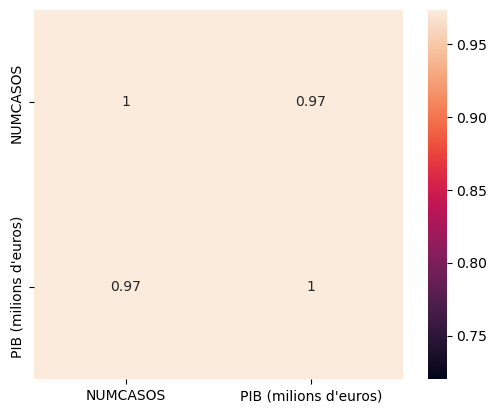

In [35]:
print('------------Correlation matrix using the whole dataframe---------------')
corrmat = df_GDP_cases.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()
print('------------Correlation matrix using the reduced (no outliers) dataframe---------------')
corrmat = df_reduced_outliers.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
plt.show()

### Question 1.B.4

**Do richer regions have a lower incidence of Covid-19?**

> After analyzing the data, it can be deduced that there exists a discernible correlation between the two variables; however, the outcome may not align with initial expectations. Specifically, there appears to be a positive association between the prevalence of Covid-19 and the affluence of a region, with areas boasting higher GDP values exhibiting higher rates of infection. Thus, **the richer the region, the higher the incidence of Covid-19**. It is important to note that in this context, "rich regions" are defined as those with a high GDP.

# Exercise 1.C. Analyze the differences of Covid-19 affecting women and men in Catalonia

The last objective is to analyze the difference between the incidence of Covid-19 in women and men for all the municipalities in Catalonia. For that we just need access data of number of cases per sex and minicipality and build a population pyramid over ages, as the one presented here:
https://altair-viz.github.io/gallery/us_population_pyramid_over_time.html

You can download the following files from the websites:
- Data of the register of cases of COVID-19 carried out in Catalonia segregated by sex and age (source: [dadescovid.cat/descarregues](https://dadescovid.cat/descarregues)): "casos_sexe_edat.csv"


<div class="alert" style="padding: 20px;background-color: #2cbc85; color: white; margin-bottom: 15px; font-size:20px">
SOLUTION EXERCISE 1.C.
</div>

First of all, let us read the `casos_sexe_edat.csv` in order to be able to answer the last two questions about incidence of Covid-19 in women and men.

In [36]:
# Read and visualization
Casos_Sex_Age = pd.read_csv(path + 'casos_sexe_edat.csv',sep=';',encoding = 'ISO-8859-1')
Casos_Sex_Age = Casos_Sex_Age.dropna()
Casos_Sex_Age.head()

,TIPUSCASDATA,REGIOSANITARIACODI,REGIOSANITARIADESCRIPCIO,EDATRANG,SEXECODI,SEXEDESCRIPCIO,TIPUSCASDESCRIPCIO,NUMCASOS
0,17/04/2020,7802,METROPOLITANA NORD,40-49,1.0,Dona,Positiu per ELISA,6
1,16/03/2021,7801,METROPOLITANA SUD,10-19,0.0,Home,Positiu per Test Ràpid,1
2,22/04/2020,7801,METROPOLITANA SUD,40-49,1.0,Dona,Positiu per ELISA,3
3,01/03/2021,7803,BARCELONA CIUTAT,70-79,0.0,Home,Positiu per ELISA,4
4,12/08/2020,7801,METROPOLITANA SUD,40-49,0.0,Home,Positiu per ELISA,2


Now, let us gather all the necessary data to be able to answer the questions. We will collect the data by gender and age using the pandas function `pivot_table`.

In [37]:
# Pivoting dataframe
df = Casos_Sex_Age.pivot_table(values='NUMCASOS', columns=['SEXEDESCRIPCIO'], index=['EDATRANG'], aggfunc='sum')
df.index.name = None
# Visualization
df

SEXEDESCRIPCIO,Dona,Home
0-9,109744,116256
10-19,184822,186669
20-29,181221,158078
30-39,214077,171316
40-49,262912,218602
50-59,186193,157860
60-69,119185,100686
70-79,84880,73362
80-89,60862,44678
90+,35047,14001


For answering the first question, let us plot a pie chart showing the number of cases per gender.
<a id='pie'></a>

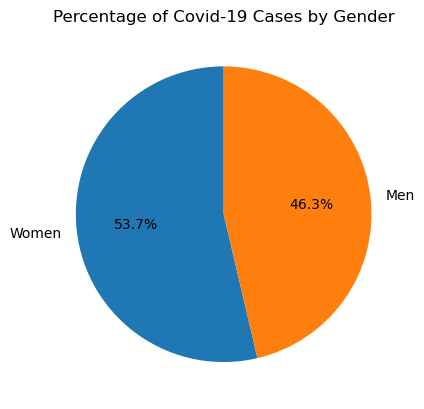

In [47]:
# Calculate the total number of cases for men and women
total_women_cases = df["Dona"].sum()
total_men_cases = df["Home"].sum()

# Create a list of the total number of cases
total_cases = [total_women_cases, total_men_cases]

# Create a list of labels and colors for the pie chart
labels = ["Women", "Men"]
colors = ['#1f77b4', '#ff7f0e']

# Create a pie chart with the total number of cases and labels
plt.pie(total_cases, labels=labels, colors = colors, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title("Percentage of Covid-19 Cases by Gender")

# Display the pie chart
plt.show()

Finally, for answering the second question, let us plot a population pyramid over ages.
<a id='pyramid'></a>

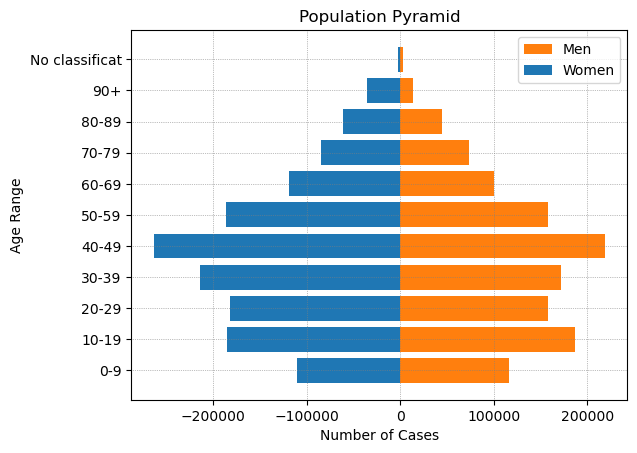

In [48]:
# Create a population pyramid
fig, ax = plt.subplots()  # Create a figure and a set of subplots

# Plot horizontal bar charts of the data
ax.barh(df.index, df['Home'], color='#ff7f0e', label='Men')  # For men, plot positive values
ax.barh(df.index, -df['Dona'], color='#1f77b4', label='Women')  # For women, plot negative values to invert the chart

# Set the labels and title
ax.set_xlabel('Number of Cases')  # Set the x-axis label
ax.set_ylabel('Age Range')  # Set the y-axis label
ax.set_title('Population Pyramid')  # Set the title of the chart

# Add a legend
ax.legend()

# Add a grid
ax.grid(color='gray', linestyle=':', linewidth=0.5)

# Display the chart
plt.show()

### Questions 1.C

**Does Covid-19 affect men more than women?**

> After analyzing the [pie chart](#pie), it is evident that the impact of Covid-19 is greater on women than men. It can be observed that 53.7% of the total Covid-19 infections were reported among women, while only 46.3% of the infections were recorded among men. Despite the relatively balanced distribution, it can be inferred that **women have been marginally more affected by the Covid-19 pandemic than men.**

**What age groups does Covid-19 affect the most for men and women?**

> It is noteworthy that **the age bracket that has been hit the hardest by Covid-19 among both men and women is the 40-49 age group.** However, when we examine the statistics for women, the 30-39 age group closely trails behind. Similarly, in the case of men, the second most affected age group is 10-19 years old. Nonetheless, it is important to note that this graph could be deceiving as it does not take into account the total number of individuals in each age group. If we were to depict these figures as a ratio, considering the total population of each age group, the older age groups would most likely have much higher numbers in comparison to [these ones](#pyramid).

# Exercise 2: Think other possible questions which can be solved.

Let us analyse the Covid-19 pandemic as a time series, studying whether vaccines have had a positive impact on reducing hospitalizations or Covid-19 cases. Natural questions could be:

**Could vaccines reduce the number of new cases of covid?**

**Could vaccines reduce the number of hospitalizations?**

In order to answer this questions, I have provided four different txt files:

+ `casos.txt`: we can find the number of weekly PCR-confirmed covid cases as a rate per 100,000 inhabitants in Catalunya.
+ `hospitalitzacions.txt`: we can find the number of people admitted to the hospital and ICU by covid in Catalunya.
+ `morts.txt`: we can find the weekly deaths by covid in Catalunya.
+ `vacunes.txt`: we can find the percentage of vaccinated population in Catalunya.

The data is provided by Idescat: https://www.idescat.cat/dades/covid19/.

First of all, let us read and visualize the files.

In [49]:
# Read the files

# Read casos.txt and convert to floats
Casos = pd.read_csv(path + 'casos.txt',sep=';',skiprows=6)
Casos = Casos.drop(['Espanya'], axis = 1)
Casos['Catalunya'] = Casos['Catalunya'].apply(lambda x: float(x.replace(',', '.')))

# Read hospitalizations.txt
Hosp = pd.read_csv(path + 'hospitalitzacions.txt',sep=';',skiprows=6).dropna()

# Read morts.txt
Morts = pd.read_csv(path + 'morts.txt',sep=';',skiprows=6)

# Read vacunes.txt and convert to floats the percentages
Vacc = pd.read_csv(path + 'vacunes.txt',sep=';',skiprows=6)
Vacc['Població vacunada amb primera dosi'] = Vacc['Població vacunada amb primera dosi'].apply(lambda x: 
                                                                                              float(x.replace(',', '.')))
Vacc['Població vacunada amb pauta completa'] = Vacc['Població vacunada amb pauta completa'].apply(lambda x: 
                                                                                                  float(x.replace(',', '.')))
Vacc['Població vacunada amb dosi addicional'] = Vacc['Població vacunada amb dosi addicional'].apply(lambda x: 
                                                                                                    float(x.replace(',', '.')))

In [50]:
# Visualization of Casos
Casos.head()

,Temps,Catalunya
0,S09/2020,0.15
1,S10/2020,1.07
2,S11/2020,29.11
3,S12/2020,116.04
4,S13/2020,151.46


In [51]:
# Visualization of Hosp
Hosp.head()

,Temps,Persones ingressades a l'hospital,Persones ingressades a l'UCI
3,S18/2020,2207.0,764
4,S19/2020,1490.0,547
5,S20/2020,1062.0,380
6,S21/2020,785.0,273
7,S22/2020,590.0,197


In [52]:
# Visualization of Morts
Morts.head()

,Temps,Defuncions
0,S09/2020,0
1,S10/2020,7
2,S11/2020,160
3,S12/2020,664
4,S13/2020,2058


In [53]:
# Visualization of Vacc
Vacc.head()

,Temps,Població vacunada amb primera dosi,Població vacunada amb pauta completa,Població vacunada amb dosi addicional
0,27/12/2020,0.01,0.0,0.0
1,03/01/2021,0.11,0.0,0.0
2,10/01/2021,0.88,0.0,0.0
3,17/01/2021,1.88,0.0,0.0
4,24/01/2021,2.29,0.1,0.0


To answer the questions, let us plot this data as time series. This will help us understand the evolution of the pandemic over time. The first plot that we are going to show, is, the evolution of the new confirmed Covid-19 cases over the time in Catalunya.
<a id='covidcases'></a>

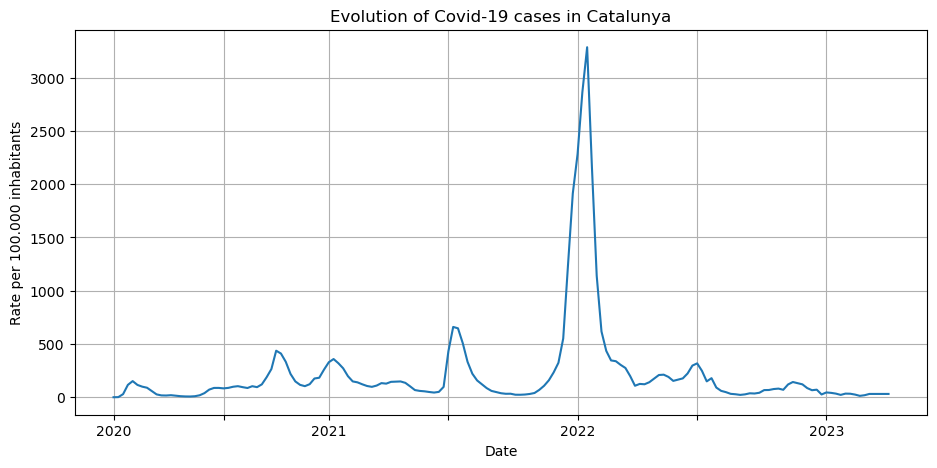

In [54]:
# Filter the data to only include the dates of interest to the labels
dates_of_interest = ['S09/2020','S32/2020','S01/2021','S26/2021', 'S01/2022','S26/2022', 'S01/2023']
filtered_data = Casos[Casos['Temps'].isin(dates_of_interest)]

# Create the plot
plt.figure(figsize=(11, 5))
plt.plot(Casos['Temps'], Casos['Catalunya'])
plt.xlabel('Date')
plt.ylabel('Rate per 100.000 inhabitants')
plt.title('Evolution of Covid-19 cases in Catalunya')

# Set the x-ticks and labels
tick_locs = filtered_data.index.values
tick_labels = ['2020','','2021','','2022','','2023']
plt.xticks(tick_locs, tick_labels)

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

Now, we can show the evolution of hospitalizations over the time.
<a id='hosp'></a>

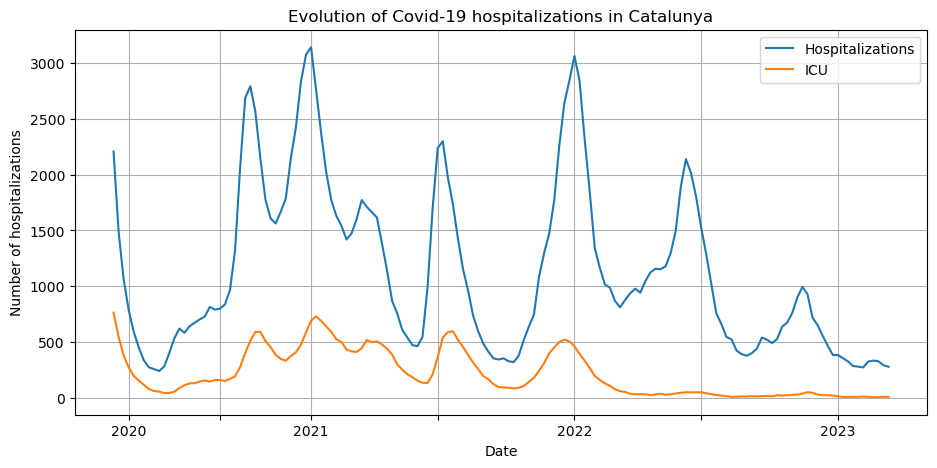

In [55]:
# Filter the data to only include the dates of interest to the labels
dates_of_interest = ['S18/2020','S36/2020','S01/2021','S26/2021', 'S01/2022','S26/2022', 'S01/2023']
filtered_data = Hosp[Hosp['Temps'].isin(dates_of_interest)]

# Create the plot
plt.figure(figsize=(11, 5))
plt.plot(Hosp['Temps'], Hosp["Persones ingressades a l'hospital"], label='Hospitalizations')
plt.plot(Hosp['Temps'], Hosp["Persones ingressades a l'UCI"],label = 'ICU')
plt.xlabel('Date')
plt.ylabel('Number of hospitalizations')
plt.title('Evolution of Covid-19 hospitalizations in Catalunya')

# Set the x-ticks and labels
tick_locs = filtered_data.index.values
tick_labels = ['2020','','2021','','2022','','2023']
plt.xticks(tick_locs, tick_labels)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

We can continue showing the evolution of death over the time. This will help us to recognise at what point in the pandemic the virus was more or less dangerous.
<a id='deaths'></a>

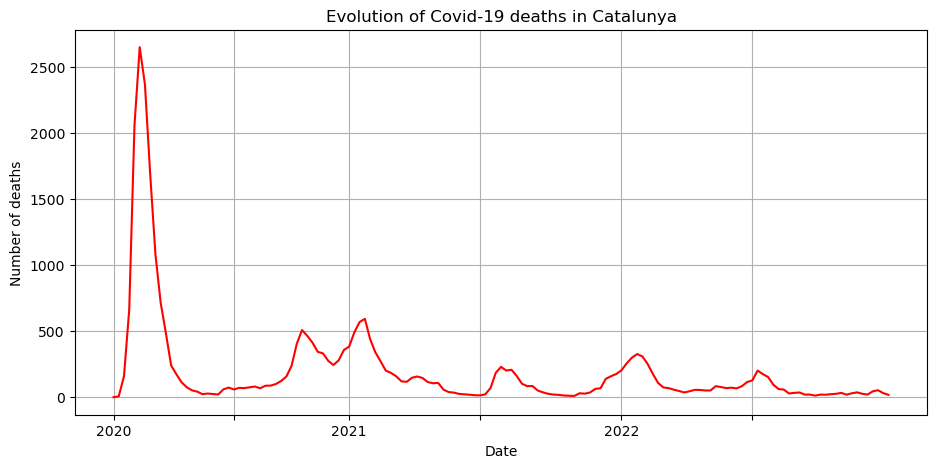

In [56]:
# Filter the data to only include the dates of interest to the labels
dates_of_interest = ['S09/2020','S32/2020','S01/2021','S26/2021', 'S01/2022','S26/2022']
filtered_data = Morts[Morts['Temps'].isin(dates_of_interest)]

# Create the plot
plt.figure(figsize=(11, 5))
plt.plot(Morts['Temps'], Morts['Defuncions'],color = 'red')
plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.title('Evolution of Covid-19 deaths in Catalunya')

# Set the x-ticks and labels
tick_locs = filtered_data.index.values
tick_labels = ['2020','','2021','','2022','']
plt.xticks(tick_locs, tick_labels)

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

Finally, the key to our study, the evolution of vaccines over the time.
<a id='vaccines'></a>

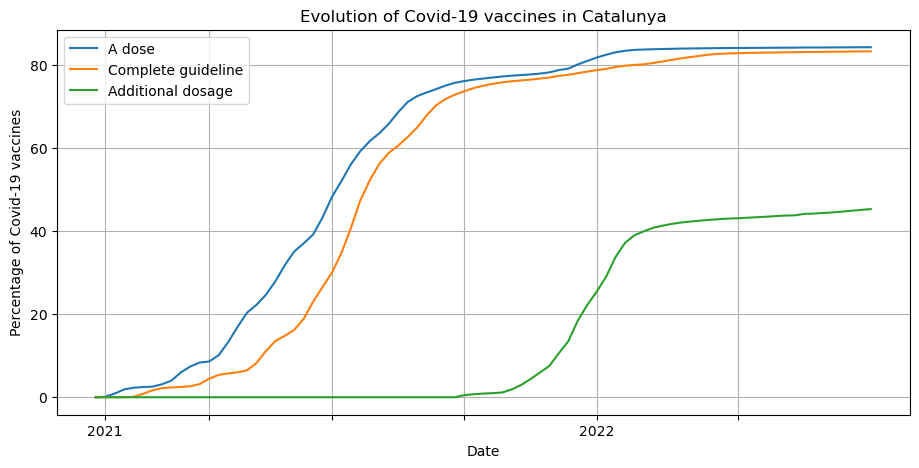

In [57]:
# Filter the data to only include the dates of interest to the labels
dates_of_interest = ['03/01/2021','21/03/2021','20/06/2021','26/09/2021', '02/01/2022','17/04/2022']
filtered_data = Vacc[Vacc['Temps'].isin(dates_of_interest)]

# Create the plot
plt.figure(figsize=(11, 5))
plt.plot(Vacc['Temps'], Vacc["Població vacunada amb primera dosi"], label='A dose')
plt.plot(Vacc['Temps'], Vacc["Població vacunada amb pauta completa"],label = 'Complete guideline')
plt.plot(Vacc['Temps'], Vacc["Població vacunada amb dosi addicional"],label = 'Additional dosage')
plt.xlabel('Date')
plt.ylabel('Percentage of Covid-19 vaccines')
plt.title('Evolution of Covid-19 vaccines in Catalunya')

# Set the x-ticks and labels
tick_locs = filtered_data.index.values
tick_labels = ['2021','','','','2022','']
plt.xticks(tick_locs, tick_labels)

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Questions

**Could vaccines reduce the number of new cases of covid?**

> Upon examining the graph illustrating the [evolution of Covid-19 cases in Catalunya](#covidcases), it can be inferred that from 2020 to 2022, the number of Covid-19 cases in Catalunya experienced a slow but seemingly "controlled" increase. In early 2022, the largest spike of Covid-19 cases was recorded, coinciding with the moment when roughly 80% of the population had completed the full vaccination schedule, as depicted in the [evolution of Covid-19 vaccines in Catalunya graph](#vaccines). Based on this evidence, we can conclude that **the vaccination campaign did not decrease the number of new Covid-19 cases** since the highest peak of Covid-19 cases in Catalunya occurred when around 80% of the population was vaccinated. Nevertheless, by examining the graph that displays the [evolution of Covid-19 deaths in Catalunya](#deaths), we can observe that even though 2022 had the highest number of new infections, it was not the period with the most fatalities. In actuality, the time with the most Covid-19 deaths, was at the beginning of the pandemic, when vaccines were unavailable. Thus, we can deduce that **the vaccines have mitigated the number of Covid-19 deaths in Catalunya.**

> Please note that it is essential to consider which Covid-19 variant was prevalent during a particular time frame. For instance, in 2022, the most prevalent variant was the Omicron strain, which was highly transmissible but not as severe as previous variants (this could also explain the spike of new Covid-19 cases without many deaths in 2022). In contrast, at the beginning of the pandemic, a more dangerous but less contagious variant may have been present, compounded by the fact that lockdown measures were in place, making transmission more compliated. However, it is possible that the lower severity of the Omicron variant is a result of widespread vaccination... As a mathematician without expertise in virology or epidemiology, we will solely concentrate on interpreting the graphs provided.

**Could vaccines reduce the number of hospitalizations?**

> Upon examining the [evolution of Covid-19 hospitalizations in Catalunya](#hosp), we can observe that prior to the introduction of vaccines in 2021, there were consistent and significant peaks in both hospitalizations and ICU admissions. In 2022, when there was a surge in Covid-19 cases, there was also a corresponding increase in hospitalizations and a small number of ICU admissions. It is noteworthy that this peak was not the highest despite being the highest recorded in Covid-19 cases. From this, we can infer that **the vaccines, which were administered to roughly 80% of the population in 2022, have contributed to reducing hospitalizations, with figures currently approaching to zero**.
